In [1]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Ex.1

Сгенерировать выборку размера
<br>
а) 20
<br>
б) 100
<br>
с плотностью $f_{\theta}(x) = e^{(\theta - x)}I_{x>\theta}$
<br>
оценить парметр $\theta$ методом ОММ, ОМП и методом спейсингов.
<br>
Повторить процедуру 500 раз. Какая из оценок оказалась более точной?

In [2]:
def rvs(theta, size):
    rv = np.random.uniform(0,1, size=size)
    return theta - np.log(1 - rv)

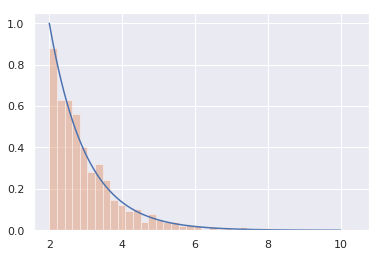

In [3]:
theta = 2
x = np.linspace(theta, 10, 1000)
sns.lineplot(x, np.exp(theta - x))
_ = sns.distplot(rvs(theta, 1000), kde=False, norm_hist=True)

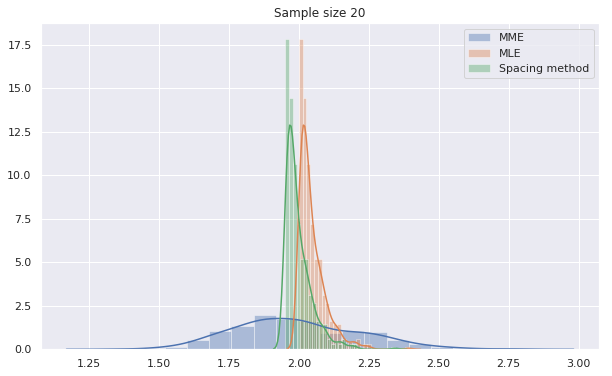

In [4]:
theta = 2
size = 20
mme, mle, sme = [], [], []
for _ in range(500):
    x = rvs(theta, size)
    mme.append(x.mean() - 1)
    mle.append(x.min())
    sme.append(x.min() + np.log(size/(size+1)))
plt.figure(figsize=(10, 6))
_ = sns.distplot(mme, label='MME')
_ = sns.distplot(mle, label='MLE')
_ = sns.distplot(sme, label='Spacing method')
_ = plt.title(f'Sample size {size}')
_ = plt.legend()

Как видно по графику оценка методом спэйсингов оказалась более точной,
<br>
худшей оценкой оказалась оценка методом моментов.
<br>
Так же из выражения для оценки методом спэйсингов видно, что 
<br>
в данном случае при увеличении количества сэмплов она будет
<br>
приближаться к оценке ОМП

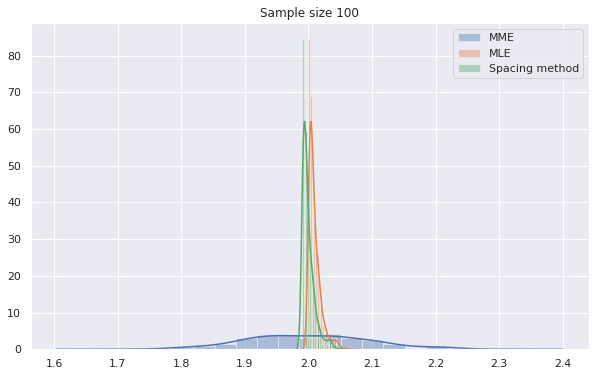

In [5]:
theta = 2
size = 100
mme, mle, sme = [], [], []
for _ in range(500):
    x = rvs(theta, size)
    mme.append(x.mean() - 1)
    mle.append(x.min())
    sme.append(x.min() + np.log(size/(size+1)))
plt.figure(figsize=(10, 6))
_ = sns.distplot(mme, label='MME')
_ = sns.distplot(mle, label='MLE')
_ = sns.distplot(sme, label='Spacing method')
_ = plt.title(f'Sample size {size}')
_ = plt.legend()

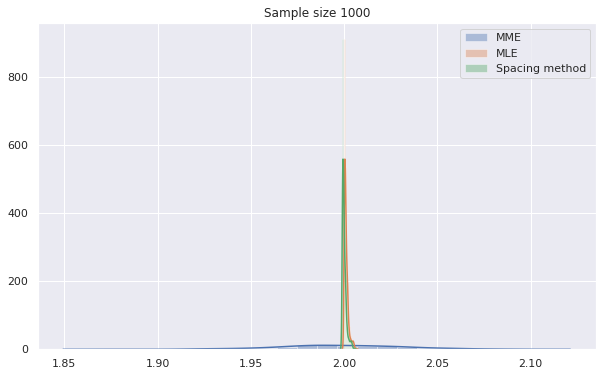

In [6]:
theta = 2
size = 1000
mme, mle, sme = [], [], []
for _ in range(500):
    x = rvs(theta, size)
    mme.append(x.mean() - 1)
    mle.append(x.min())
    sme.append(x.min() + np.log(size/(size+1)))
plt.figure(figsize=(10, 6))
_ = sns.distplot(mme, label='MME')
_ = sns.distplot(mle, label='MLE')
_ = sns.distplot(sme, label='Spacing method')
_ = plt.title(f'Sample size {size}')
_ = plt.legend()

### Ex. 2

В партии пушек с некоторой вероятностью появляется пушка с браком. В файле Sample1.txt записаны точки падения 
<br>
снаряда по точке 0. В файле Sample2.txt записаны результаты для пушки с браком. А в файле Sample3.txt записаны 
<br>
результаты выстрелов батареи из большого числа пушек. Оценить вероятность брака.

In [7]:
good_gun_obs = np.array(list(map(float, open('Sample1.txt').readlines()[0].split())))
bad_gun_obs = np.array(list(map(float, open('Sample2.txt').readlines()[0].split())))
battery_obs = np.array(list(map(float, open('Sample3.txt').readlines()[0].split())))

In [8]:
good_gun_obs.shape, bad_gun_obs.shape, battery_obs.shape

((4000,), (6000,), (3000,))

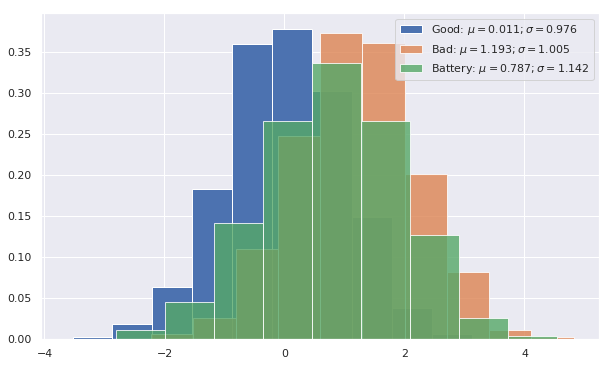

In [9]:
plt.figure(figsize=(10, 6))
mu, sigma = good_gun_obs.mean(), good_gun_obs.std()
_ = plt.hist(good_gun_obs, density=True, label=f'Good: $\\mu = {mu:.3f}; \\sigma = {sigma:.3f}$')
mu, sigma = bad_gun_obs.mean(), bad_gun_obs.std()
_ = plt.hist(bad_gun_obs, density=True, label=f'Bad: $\\mu = {mu:.3f}; \\sigma = {sigma:.3f}$', alpha=0.8)
mu, sigma = battery_obs.mean(), battery_obs.std()
_ = plt.hist(battery_obs, density=True, label=f'Battery: $\\mu = {mu:.3f}; \\sigma = {sigma:.3f}$', alpha=0.8)
_ = plt.legend()

По графику видно, что во-первых у бракованной пушки смещен прицел, а во-вторых в батареи вполне вероятно
<br>
присутвует брак. Оценим вероятность методом максимального правдоподобия.
<br>
$L(x_1, \dots, x_n, p, \mu_1, \sigma_1, \mu_2, \sigma_2) = \prod_i^n\left(\frac{p}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{(x_i - \mu_1)^2}{2\sigma_1^2}} + \frac{1-p}{\sqrt{2\pi\sigma_2^2}}e^{-\frac{(x_i - \mu_2)^2}{2\sigma_2^2}}\right)$
<br>
Причем по данным нам известны оценки $\mu_i, \sigma_i, i \in \{1,2\}$, следовательно осталось оценить $p$

In [10]:
def mle_p(x, mu1, sigma1, mu2, sigma2):
    x1 = np.exp(-0.5 * (x - mu1)**2 / sigma1**2) / np.sqrt(2 * np.pi * sigma1**2)
    x2 = np.exp(-0.5 * (x - mu2)**2 / sigma2**2) / np.sqrt(2 * np.pi * sigma2**2)
    def loss(p):
        return -np.log(p*x1 + (1-p) * x2).sum()
    return scipy.optimize.minimize(loss, [0.5], bounds=[(0,1)])

In [11]:
mu1, sigma1 = good_gun_obs.mean(), good_gun_obs.std()
mu2, sigma2 = bad_gun_obs.mean(), bad_gun_obs.std()
res = mle_p(battery_obs, mu1, sigma1, mu2, sigma2)
res

      fun: 4651.084008454911
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 4
   status: 0
  success: True
        x: array([0.33792427])

Следовательно вероятность брака $\overline{q} = 1 - \overline{p} = 0.662$ 

### Ex. 3

Выборка $\left(X_1, \dots, X_n\right)$ имеет распределние Коши со сдвигом $\theta$. Численно найти ОМП и сравнить ее на нескольких выборках с медианной в с точки зрения среднего разброса.

In [12]:
def mle_cauchy(x, gamma):
    def loss(theta):
        return np.log(1 + (x - theta)**2 / gamma).sum()
    return scipy.optimize.minimize(loss, np.random.randn(1))

In [13]:
gamma = 1
theta = 1.7
c_dist = scipy.stats.cauchy(theta, gamma)
x = c_dist.rvs(100)

In [14]:
theta_mle = mle_cauchy(x, gamma)
theta_mle

      fun: 136.5219719639727
 hess_inv: array([[0.02117894]])
      jac: array([-3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([1.70647307])

In [15]:
diff = np.array([np.percentile(c_dist.rvs(100), 50) - theta_mle.x for _ in range(50)])
diff.std()

0.13729677194304504